In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
plt.style.use("ggplot")


In [134]:
df=pd.read_csv("global_terrorism.csv")
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_24568\146698009.py:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [135]:
india = df[df["country_txt"] == "India"]
india.shape


(11960, 135)

In [136]:
india = india[(india["iyear"] >= 2008) & (india["iyear"] <= 2020)]


In [137]:
india.columns.tolist()


['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [138]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import geopandas as gpd
from datetime import datetime
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Optional: for PPT export at end
from pptx import Presentation
from pptx.util import Inches

In [139]:
import pandas as pd

path = "global_terrorism.csv"

sample = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False, nrows=20000)

print("Sample shape:", sample.shape)
print("First 30 columns:", sample.columns.tolist()[:30])
sample.head()


Sample shape: (20000, 135)
First 30 columns: ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt']


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [140]:
import pandas as pd

path = "global_terrorism.csv"

chunks = pd.read_csv(path, encoding='ISO-8859-1', low_memory=False, chunksize=50000)

df = pd.concat(chunks, ignore_index=True)

print("Full dataset loaded. Shape:", df.shape)


Full dataset loaded. Shape: (181691, 135)


In [141]:
cols = df.columns.tolist()
print("Total columns:", len(cols))

required = [
    'eventid','iyear','imonth','iday','country_txt',
    'provstate','city','latitude','longitude',
    'attacktype1_txt','targtype1_txt','weaptype1_txt',
    'gname','nkill','nwound'
]

for c in required:
    print(c, "->", "FOUND" if c in cols else "MISSING")

print("\nYear range:", df['iyear'].min(), "to", df['iyear'].max())


Total columns: 135
eventid -> FOUND
iyear -> FOUND
imonth -> FOUND
iday -> FOUND
country_txt -> FOUND
provstate -> FOUND
city -> FOUND
latitude -> FOUND
longitude -> FOUND
attacktype1_txt -> FOUND
targtype1_txt -> FOUND
weaptype1_txt -> FOUND
gname -> FOUND
nkill -> FOUND
nwound -> FOUND

Year range: 1970 to 2017


In [142]:
start_year = 2008
end_year   = 2017    # your dataset ends at 2017

india = df[df['country_txt'] == 'India'].copy()
india = india[(india['iyear'] >= start_year) & (india['iyear'] <= end_year)]

print("India incidents from 2008 to 2017:", india.shape)
india.head()


India incidents from 2008 to 2017: (7554, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
85350,200801010003,2008,1,1,NaN,0,NaN,92,India,6,...,Authorities intercepted some phone calls which...,"The Advertiser (Australia), ï¿½Eight die in po...","United Press International, ï¿½Indian police c...","Bisawajeet Banerjee, ï¿½7 police officers, 1 c...",CETIS,1,1,0,1,NaN
85361,200801010015,2008,1,1,NaN,0,NaN,92,India,6,...,Authorities suspect Maoist rebels.,"Biswajeet Banerjee, ï¿½12 killed in 2 separate...","Indo-Asian News Service, ï¿½Maoists kill four ...",NaN,CETIS,-9,-9,0,-9,NaN
85370,200801010024,2008,1,1,NaN,0,NaN,92,India,6,...,Police suspect Maoist guerrillas for the attack.,"Indo-Asian News Service, ï¿½Maoists kill two C...","The Statesman (India), ï¿½Maoists mow down 2 C...",NaN,CETIS,-9,-9,0,-9,NaN
85371,200801010025,2008,1,1,NaN,0,NaN,92,India,6,...,Police suspect Maoist guerrillas for the attack.,"Indo-Asian News Service, ï¿½Maoists kill two C...","The Statesman (India), ï¿½Maoists mow down 2 C...",NaN,CETIS,-9,-9,0,-9,NaN
85391,200801020019,2008,1,2,NaN,0,NaN,92,India,6,...,NaN,"Indo-Asian News Service, ï¿½Crude bomb found i...",NaN,NaN,CETIS,-9,-9,0,-9,NaN


In [143]:
import pandas as pd

# Convert iyear/imonth/iday → proper date
def make_date(row):
    y = int(row['iyear'])
    m = int(row['imonth']) if 1 <= int(row['imonth']) <= 12 else 1
    d = int(row['iday']) if 1 <= int(row['iday']) <= 31 else 1
    try:
        return pd.Timestamp(year=y, month=m, day=d)
    except:
        return pd.NaT

india['date'] = india.apply(make_date, axis=1)

# Clean casualties (convert to numeric)
india['nkill'] = pd.to_numeric(india['nkill'], errors='coerce').fillna(0)
india['nwound'] = pd.to_numeric(india['nwound'], errors='coerce').fillna(0)

print(india[['iyear','imonth','iday','date','nkill','nwound']].head())


       iyear  imonth  iday       date  nkill  nwound
85350   2008       1     1 2008-01-01    8.0     7.0
85361   2008       1     1 2008-01-01    4.0     0.0
85370   2008       1     1 2008-01-01    1.0     0.0
85371   2008       1     1 2008-01-01    1.0     0.0
85391   2008       1     2 2008-01-02    0.0     0.0


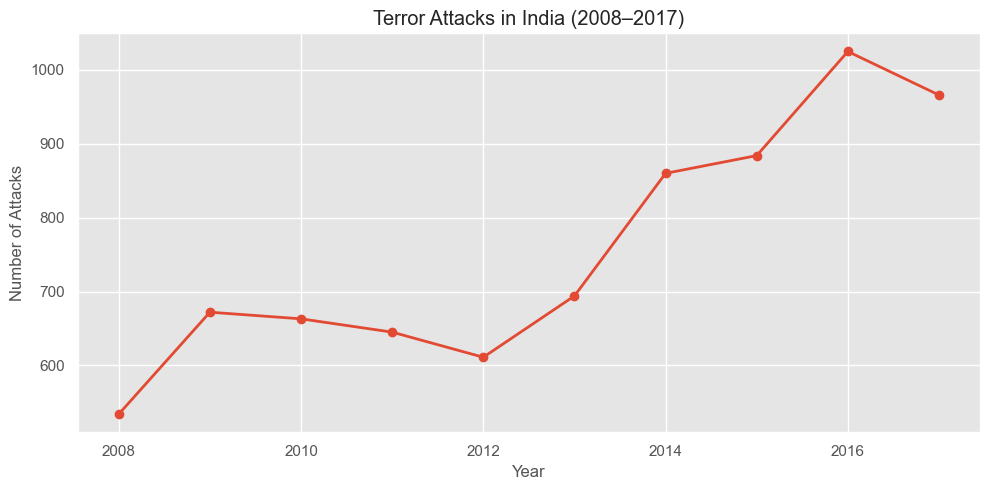

In [144]:
import matplotlib.pyplot as plt

attacks_per_year = india.groupby('iyear').size()

plt.figure(figsize=(10,5))
attacks_per_year.plot(marker='o', linewidth=2)
plt.title('Terror Attacks in India (2008–2017)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()


In [145]:
india = df[df['country_txt'] == 'India'].copy()

# full range 1970 to 2017 (dataset maximum)
india = india[(india['iyear'] >= 1970) & (india['iyear'] <= 2017)]

print("Total India attacks (1970–2017):", india.shape)
india.head()


Total India attacks (1970–2017): (11960, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
2764,197501190004,1975,1,2,NaN,0,NaN,92,India,6,...,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN
3857,197605260001,1976,5,26,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
5327,197709280004,1977,9,28,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
7337,197901130004,1979,1,13,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


In [146]:
def make_date(row):
    y = int(row['iyear'])
    m = int(row['imonth']) if 1 <= int(row['imonth']) <= 12 else 1
    d = int(row['iday']) if 1 <= int(row['iday']) <= 31 else 1
    try:
        return pd.Timestamp(year=y, month=m, day=d)
    except:
        return pd.NaT

india['date'] = india.apply(make_date, axis=1)

india['nkill'] = pd.to_numeric(india['nkill'], errors='coerce').fillna(0)
india['nwound'] = pd.to_numeric(india['nwound'], errors='coerce').fillna(0)


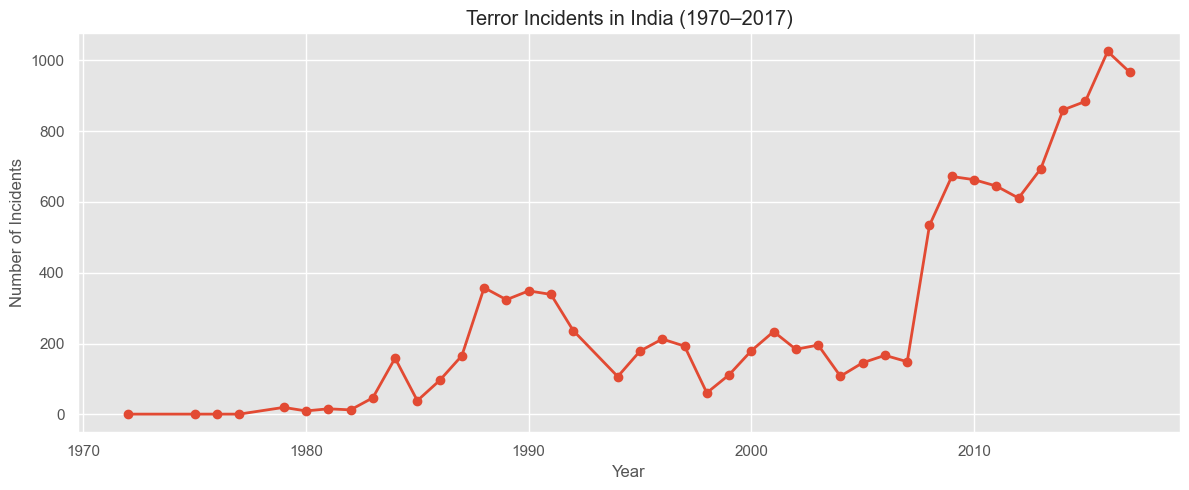

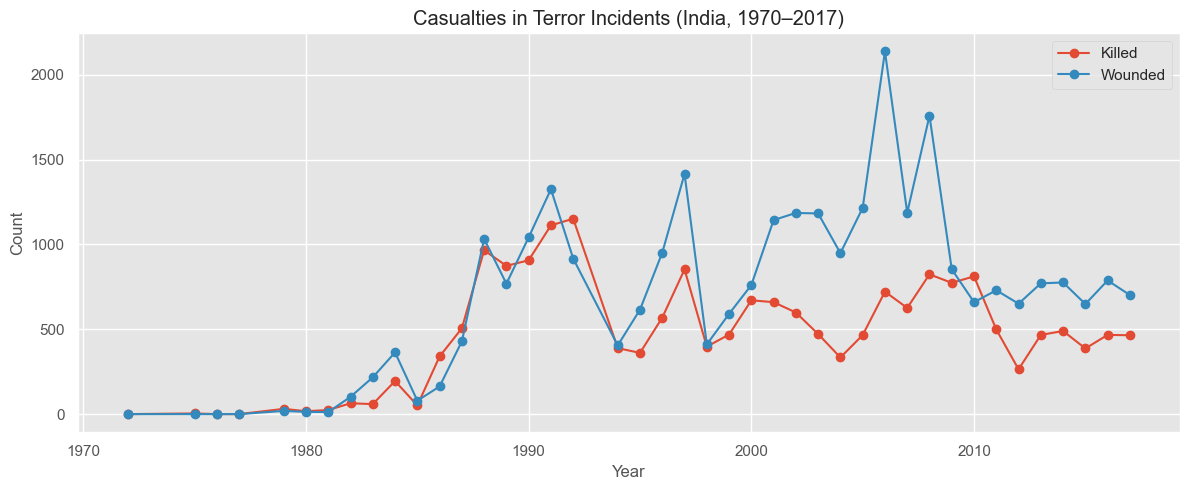

In [147]:
# Step 6: Time series plots for 1970-2017
import matplotlib.pyplot as plt

# incidents per year
attacks_per_year = india.groupby('iyear').size()

plt.figure(figsize=(12,5))
attacks_per_year.plot(marker='o', linewidth=2)
plt.title('Terror Incidents in India (1970–2017)')
plt.xlabel('Year'); plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.savefig('attacks_per_year_1970_2017.png', dpi=150)
plt.show()

# casualties (killed + wounded) per year
killed_per_year = india.groupby('iyear')['nkill'].sum()
wounded_per_year = india.groupby('iyear')['nwound'].sum()

plt.figure(figsize=(12,5))
plt.plot(killed_per_year.index, killed_per_year.values, marker='o', label='Killed')
plt.plot(wounded_per_year.index, wounded_per_year.values, marker='o', label='Wounded')
plt.title('Casualties in Terror Incidents (India, 1970–2017)')
plt.xlabel('Year'); plt.ylabel('Count')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.savefig('casualties_per_year_1970_2017.png', dpi=150)
plt.show()


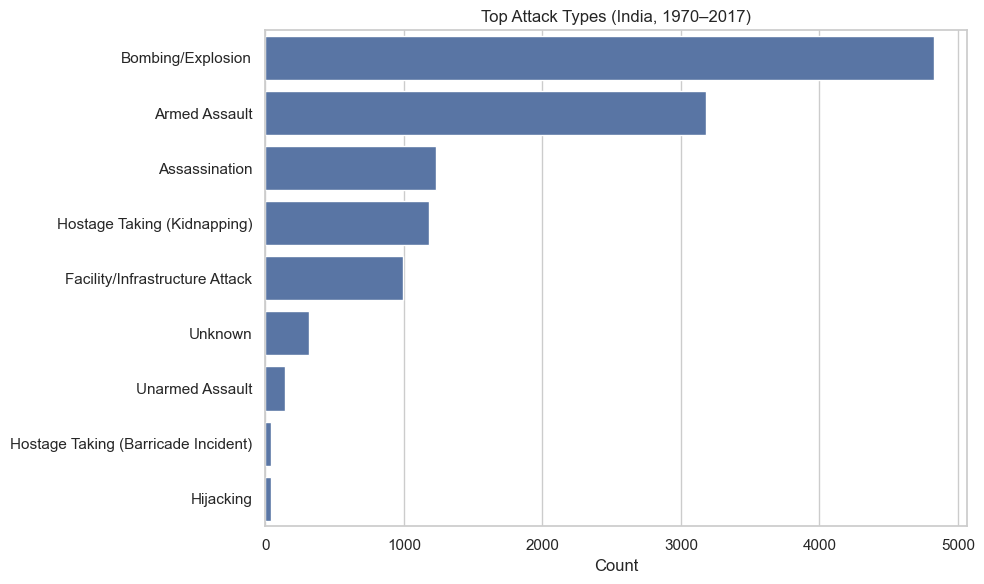

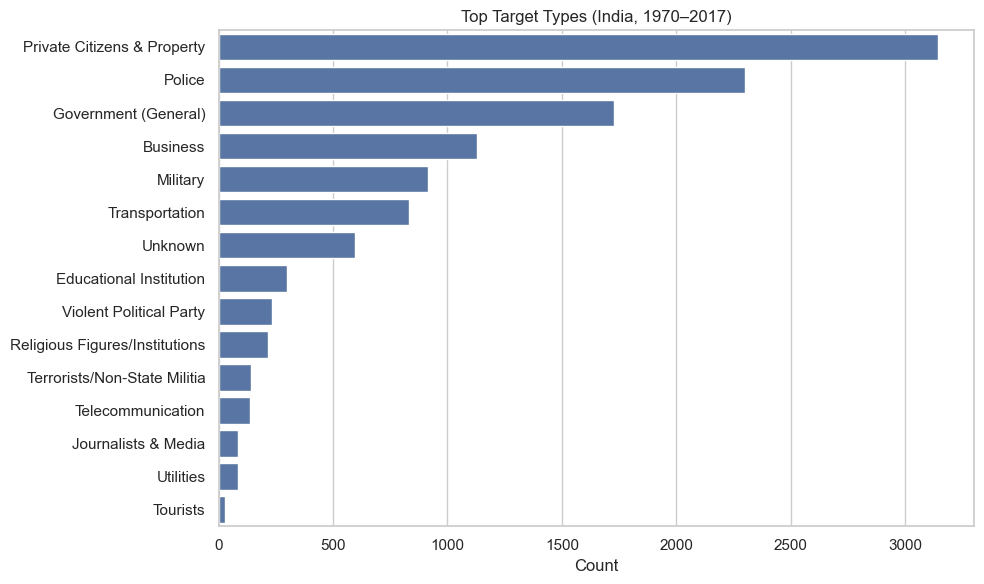

In [148]:
# Step 7: Attack type and target type distributions (top 15)
import seaborn as sns
sns.set_theme(style="whitegrid")   # FIXED STYLE

# Top attack types
top_attack_types = india['attacktype1_txt'].value_counts().nlargest(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_attack_types.values, y=top_attack_types.index)
plt.title('Top Attack Types (India, 1970–2017)')
plt.xlabel('Count'); plt.ylabel('')
plt.tight_layout()
plt.savefig('attack_types_top15_1970_2017.png', dpi=150)
plt.show()

# Top target types
top_target_types = india['targtype1_txt'].value_counts().nlargest(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_target_types.values, y=top_target_types.index)
plt.title('Top Target Types (India, 1970–2017)')
plt.xlabel('Count'); plt.ylabel('')
plt.tight_layout()
plt.savefig('target_types_top15_1970_2017.png', dpi=150)
plt.show()


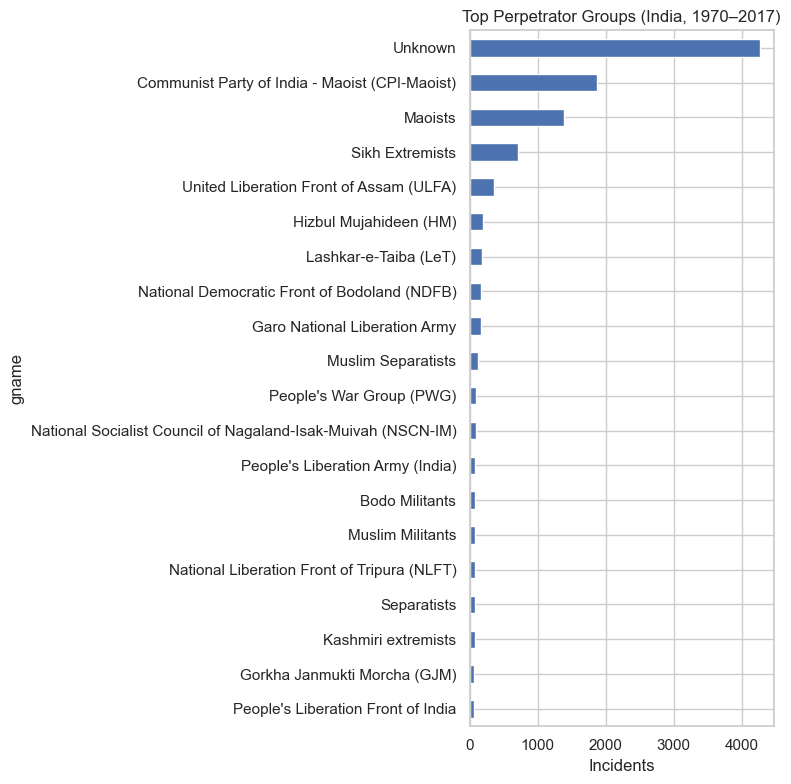

Unknown group incidents: 4263
Known group incidents: 7697


In [149]:
# Step 8: Top perpetrator groups
plt.figure(figsize=(8,8))
top_groups = india['gname'].value_counts().head(20)
top_groups.plot(kind='barh')
plt.title('Top Perpetrator Groups (India, 1970–2017)')
plt.xlabel('Incidents')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_groups_1970_2017.png', dpi=150)
plt.show()

# Count Unknown vs Known groups
unknown_count = (india['gname'] == 'Unknown').sum()
known_count = india.shape[0] - unknown_count
print("Unknown group incidents:", unknown_count)
print("Known group incidents:", known_count)


In [150]:
# Step 9: Create Folium interactive map of incidents with lat/long
import folium
from folium.plugins import MarkerCluster

map_df = india.dropna(subset=['latitude','longitude']).copy()
print("Incidents with coordinates:", map_df.shape[0])

# base map centered on India
india_map = folium.Map(location=[22.0,78.0], zoom_start=5, tiles='CartoDB positron')

# use MarkerCluster for performance/clarity
marker_cluster = MarkerCluster().add_to(india_map)

for _, row in map_df.iterrows():
    popup = (
        f"Date: {row['date'].date() if not pd.isna(row['date']) else row['iyear']}<br>"
        f"State: {row['provstate']}<br>City: {row['city']}<br>"
        f"Type: {row['attacktype1_txt']}<br>"
        f"Killed: {int(row['nkill'])}, Wounded: {int(row['nwound'])}<br>"
        f"Group: {row['gname']}"
    )
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3 + min(12, (row['nkill']**0.5) if row['nkill']>0 else 0),
        color='darkred' if row['nkill']>0 else 'blue',
        fill=True, fill_opacity=0.6,
        popup=folium.Popup(popup, max_width=400)
    ).add_to(marker_cluster)

map_html = 'india_attacks_map_full.html'
india_map.save(map_html)
print("Saved interactive map:", map_html)


Incidents with coordinates: 11801
Saved interactive map: india_attacks_map_full.html


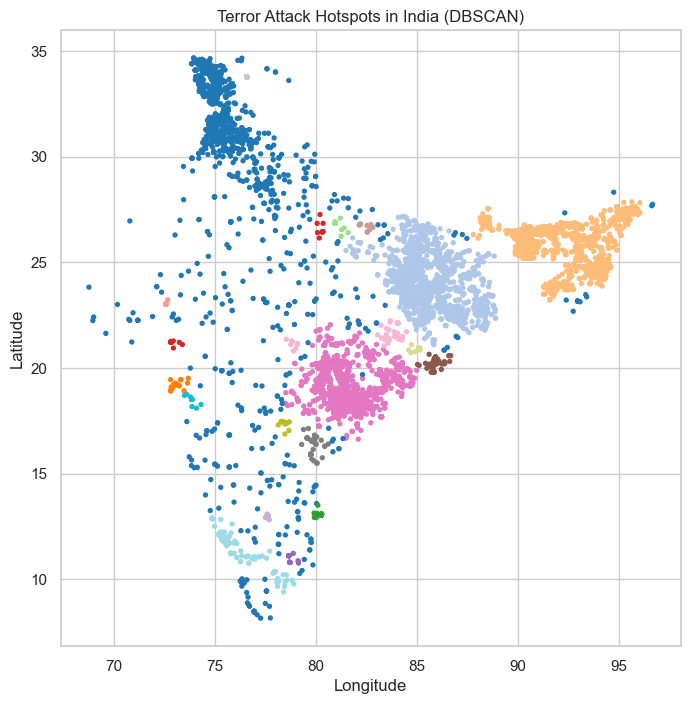

Cluster labels: [ 0  1  2  3 -1  4  5  6 13  7  8  9 14 10 11 22 12 15 16 17 18 20 19 21]
Cluster sizes: cluster
 0     3644
 3     2980
 1     2156
 13    1812
-1      409
 17     152
 22     116
 2       68
 16      53
 15      49
Name: count, dtype: int64


In [151]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

map_df = india.dropna(subset=['latitude','longitude']).copy()

coords = map_df[['latitude','longitude']].to_numpy()

# Convert to radians for haversine
coords_rad = np.radians(coords)
kms_per_radian = 6371.0088

# eps_km = cluster radius (in km). You can try 10, 25, 50.
eps_km = 50

db = DBSCAN(
    eps=eps_km / kms_per_radian,
    min_samples=10,
    metric='haversine'
).fit(coords_rad)

map_df['cluster'] = db.labels_

plt.figure(figsize=(8,8))
plt.scatter(map_df['longitude'], map_df['latitude'], c=map_df['cluster'], cmap='tab20', s=8)
plt.title('Terror Attack Hotspots in India (DBSCAN)')
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.grid(True)
plt.savefig('india_hotspots.png', dpi=150)
plt.show()

print("Cluster labels:", map_df['cluster'].unique())
print("Cluster sizes:", map_df['cluster'].value_counts().head(10))


In [152]:
import plotly.express as px

anim_df = india.dropna(subset=['latitude','longitude']).copy()
anim_df['year'] = anim_df['iyear']

fig = px.scatter_geo(
    anim_df,
    lat='latitude',
    lon='longitude',
    color='attacktype1_txt',
    hover_name='city',
    animation_frame='year',
    projection='natural earth',
    title='Animated Terror Attacks in India (1970–2017)',
    height=700
)

fig.update_geos(scope='asia')
fig.write_html("india_animated_timeline.html")

print("Saved:", "india_animated_timeline.html")


Saved: india_animated_timeline.html


In [153]:
risk = india.groupby('provstate').agg(
    incidents=('eventid','count'),
    killed=('nkill','sum'),
    wounded=('nwound','sum')
).reset_index()

risk['risk_score'] = (
    risk['incidents'].rank(pct=True)*0.5 +
    risk['killed'].rank(pct=True)*0.3 +
    risk['wounded'].rank(pct=True)*0.2
)

risk = risk.sort_values('risk_score', ascending=False)
risk.to_csv('india_risk_scores.csv', index=False)

risk.head(15)


,provstate,incidents,killed,wounded,risk_score
12,Jammu and Kashmir,2454,4079.0,8569.0,1.000000
3,Assam,1151,2112.0,3953.0,0.962857
25,Punjab,949,2751.0,2274.0,0.922857
6,Chhattisgarh,979,1465.0,1053.0,0.897143
18,Manipur,1100,747.0,1087.0,0.882857
13,Jharkhand,887,796.0,723.0,0.828571
17,Maharashtra,302,1010.0,2036.0,0.814286
4,Bihar,688,765.0,561.0,0.794286
34,West Bengal,650,671.0,986.0,0.782857
0,Andhra Pradesh,251,543.0,676.0,0.694286


          state_name                                           geometry
0     Andhra Pradesh  POLYGON ((80.88183 16.4274, 81.38183 16.4274, ...
1  Arunachal Pradesh  POLYGON ((81.22008 12.86543, 81.72008 12.86543...
2              Assam  POLYGON ((88.6517 22.90696, 89.1517 22.90696, ...
3              Bihar  POLYGON ((76.1898 9.67506, 76.6898 9.67506, 76...
4       Chhattisgarh  POLYGON ((95.23478 20.85329, 95.73478 20.85329...


<Figure size 1200x1000 with 0 Axes>

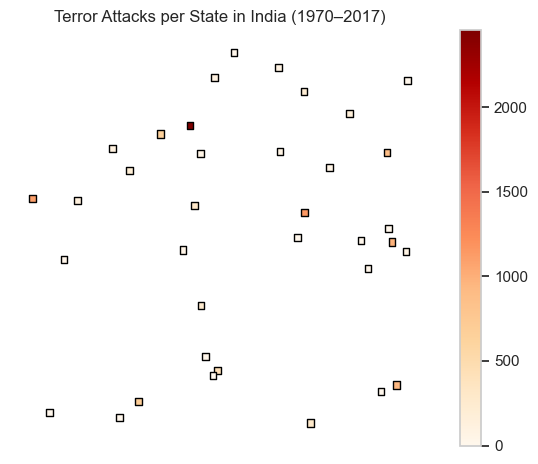

In [154]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the geojson we just created
geo_path = "india_states.geojson"

# Load the GeoJSON
states = gpd.read_file(geo_path)

print(states.head())   # check structure

# Use state_name directly because we added it in properties
states['state_name'] = states['state_name'].astype(str)

# Count incidents per state
state_counts = india.groupby('provstate').size().reset_index(name='incidents')

# Merge GeoJSON with state_counts
merged = states.merge(state_counts, left_on='state_name', right_on='provstate', how='left')
merged['incidents'] = merged['incidents'].fillna(0)

# Plot Choropleth
plt.figure(figsize=(12, 10))
merged.plot(column='incidents', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Terror Attacks per State in India (1970–2017)')
plt.axis('off')
plt.tight_layout()
plt.savefig("india_choropleth_states.png", dpi=150)
plt.show()


In [155]:
# Step 13: Risk Scoring Model for Indian States

# Aggregate values per state
risk = india.groupby('provstate').agg(
    incidents=('eventid','count'),
    killed=('nkill','sum'),
    wounded=('nwound','sum')
).reset_index()

# Replace NaNs
risk = risk.fillna(0)

# Risk scoring formula:
# 50% incidents, 30% killed, 20% wounded
risk['risk_score'] = (
    risk['incidents'].rank(pct=True) * 0.5 +
    risk['killed'].rank(pct=True) * 0.3 +
    risk['wounded'].rank(pct=True) * 0.2
)

# Sort by risk score
risk = risk.sort_values('risk_score', ascending=False)

# Save to CSV
risk.to_csv("india_risk_scores.csv", index=False)

risk.head(15)


,provstate,incidents,killed,wounded,risk_score
12,Jammu and Kashmir,2454,4079.0,8569.0,1.000000
3,Assam,1151,2112.0,3953.0,0.962857
25,Punjab,949,2751.0,2274.0,0.922857
6,Chhattisgarh,979,1465.0,1053.0,0.897143
18,Manipur,1100,747.0,1087.0,0.882857
13,Jharkhand,887,796.0,723.0,0.828571
17,Maharashtra,302,1010.0,2036.0,0.814286
4,Bihar,688,765.0,561.0,0.794286
34,West Bengal,650,671.0,986.0,0.782857
0,Andhra Pradesh,251,543.0,676.0,0.694286


In [156]:
from pptx import Presentation
from pptx.util import Inches
import os

# Create PPT
ppt = Presentation()

# TITLE SLIDE
slide = ppt.slides.add_slide(ppt.slide_layouts[0])
slide.shapes.title.text = "Terrorism Analysis in India (1970–2017)"
slide.placeholders[1].text = (
    "Using Global Terrorism Database (GTD)\n"
    "Visualisation, Hotspots, State Risk, Mapping\n"
    "Created with Python"
)

# List of images to add to PPT
images = [
    ("attacks_per_year_1970_2017.png", "Terror Attacks per Year (1970–2017)"),
    ("casualties_per_year_1970_2017.png", "Casualties per Year"),
    ("attack_types_top15_1970_2017.png", "Top Attack Types"),
    ("target_types_top15_1970_2017.png", "Top Target Types"),
    ("top_groups_1970_2017.png", "Top Terrorist Groups"),
    ("india_hotspots.png", "Hotspot Clusters (DBSCAN)"),
    ("india_choropleth_states.png", "State-wise Terror Attack Heatmap")
]

# Add image slides
for img, title in images:
    if os.path.exists(img):
        slide = ppt.slides.add_slide(ppt.slide_layouts[5])  # blank slide
        # Add title
        tx = slide.shapes.add_textbox(Inches(0.5), Inches(0.2), Inches(9), Inches(1))
        tf = tx.text_frame
        tf.text = title
        # Add image
        slide.shapes.add_picture(img, Inches(0.5), Inches(1), width=Inches(9))

# ADD INTERACTIVE MAP INFO SLIDE
slide = ppt.slides.add_slide(ppt.slide_layouts[1])
slide.shapes.title.text = "Interactive Visualisations"
slide.placeholders[1].text = (
    "The following files were generated:\n\n"
    "1. india_attacks_map_full.html  — Interactive zoomable map\n"
    "2. india_animated_timeline.html — Year-by-year animated map\n\n"
    "Open these HTML files in a browser for full interaction."
)

# SAVE PPT
output = "India_Terror_Analysis_Project.pptx"
ppt.save(output)

print("PPT Created Successfully:", output)


PPT Created Successfully: India_Terror_Analysis_Project.pptx
